# Multiple Linear Regression

## Load Libraries

In [33]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from scipy import stats
import seaborn as sns
sns.set_style("darkgrid")
 
pd.options.display.float_format = '{:,.1f}'.format


from statsmodels.formula.api import ols


import warnings
warnings.filterwarnings("ignore")

## Load and Verify Data

In [34]:
df = pd.read_csv("data/academicperformance.csv")

In [35]:
df.head()

,GPA,FamilyIncome,Sleep,District,StudyTime,Grade
0,2.9,82461,6.5,4,47,77
1,3.7,61113,6.2,6,47,94
2,2.8,63632,6.2,5,39,69
3,2.0,66854,7.2,5,49,81
4,2.8,82721,5.5,5,49,78


In [36]:
df.describe()

,GPA,FamilyIncome,Sleep,District,StudyTime,Grade
count,"2,077.0","2,077.0","2,077.0","2,077.0","2,077.0","2,077.0"
mean,2.7,"75,282.6",6.0,5.0,39.1,69.2
std,0.8,"15,264.4",1.0,1.0,9.4,14.5
min,0.2,"27,952.0",2.5,1.0,7.0,19.0
25%,2.2,"65,073.0",5.3,4.0,32.0,60.0
50%,2.8,"75,040.0",6.0,5.0,39.0,70.0
75%,3.3,"85,492.0",6.7,6.0,46.0,79.0
max,4.0,"128,655.0",10.1,8.0,70.0,100.0


## Linear Regression without Categorical Variable

Note: ``Grade`` is the target variable. ``GPA``, ``Sleep`` , and ``StudyTime`` are the feature variables

In [37]:
mlr = ols('Grade ~ GPA + Sleep + StudyTime', df).fit()

In [38]:
mlr.params

Intercept   -39.7
GPA           9.1
Sleep         7.2
StudyTime     1.1
dtype: float64

Text(0.5, 0, 'StudyTime')

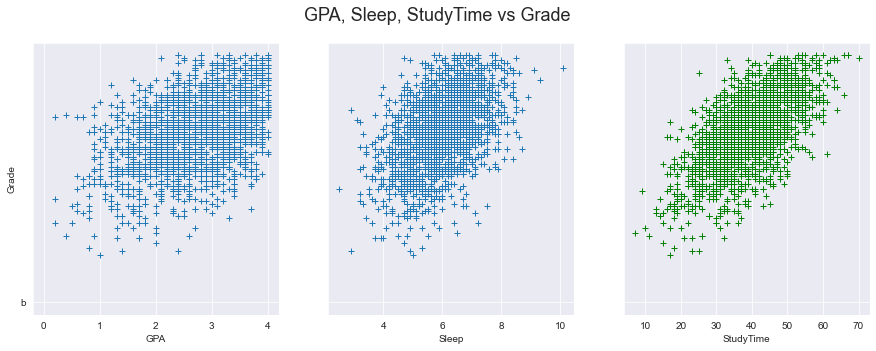

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5),sharey=True)

fig.suptitle("GPA, Sleep, StudyTime vs Grade", fontsize=18)
ax1.set_ylabel("Grade")
ax1.plot(df.GPA, df.Grade, '+','b')
ax1.set_xlabel("GPA")
ax2.plot(df.Sleep, df.Grade, '+')
ax2.set_xlabel("Sleep")
ax3.plot(df.StudyTime,df.Grade,'+',c='g')
ax3.set_xlabel("StudyTime")


In [40]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Grade   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     5653.
Date:                Sun, 04 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:07:56   Log-Likelihood:                -6191.4
No. Observations:                2077   AIC:                         1.239e+04
Df Residuals:                    2073   BIC:                         1.241e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.7098      0.879    -45.179      0.000     -41.434     -37.986
GPA            9.0992      0.136     67.065      0.000       8.833       9.365
Sleep          7.2070      0.104     69.500      0.000       7.004       7.410
StudyTime      1.0580      0.011     95.102      0.000       1.036       1.080
==============================================================================
Omnibus:                        1.358   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.305
Skew:                          -0.014   Prob(JB):                        0.521
Kurtosis:                       3.120   Cond. No.                         344.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression with Category

In [41]:
mlr = ols('Grade ~ GPA + Sleep + StudyTime +C(District)', df).fit()

In [42]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Grade   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.581e+04
Date:                Sun, 04 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:07:57   Log-Likelihood:                -3975.8
No. Observations:                2077   AIC:                             7974.
Df Residuals:                    2066   BIC:                             8036.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -59.6841      1.677    -35.600      0.000     -62.972     -56.396
C(District)[T.2]     5.0053      1.713      2.921      0.004       1.645       8.365
C(District)[T.3]     9.4184      1.653      5.698      0.000       6.177      12.660
C(District)[T.4]    13.7648      1.648      8.351      0.000      10.532      16.997
C(District)[T.5]    18.1589      1.648     11.021      0.000      14.928      21.390
C(District)[T.6]    22.5245      1.648     13.664      0.000      19.292      25.757
C(District)[T.7]    26.9780      1.654     16.308      0.000      23.734      30.222
C(District)[T.8]    31.2315      1.705     18.316      0.000      27.887      34.575
GPA                  9.4349      0.047    201.086      0.000       9.343       9.527
Sleep                7.2437      0.036    202.414      0.000       7.174       7.314
StudyTime            1.0780      0.004    280.725      0.000       1.070       1.086
==============================================================================
Omnibus:                       25.246   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.738
Skew:                          -0.010   Prob(JB):                     0.000382
Kurtosis:                       2.574   Cond. No.                     5.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Standardized

In [43]:
df_s = df.drop('District',axis=1)
scaler = StandardScaler()
df_s=pd.DataFrame(scaler.fit_transform(df_s),columns=df_s.columns)

In [44]:
df_s.head()

,GPA,FamilyIncome,Sleep,StudyTime,Grade
0,0.3,0.5,0.5,0.8,0.5
1,1.3,-0.9,0.2,0.8,1.7
2,0.1,-0.8,0.2,-0.0,-0.0
3,-0.9,-0.6,1.2,1.0,0.8
4,0.1,0.5,-0.5,1.0,0.6


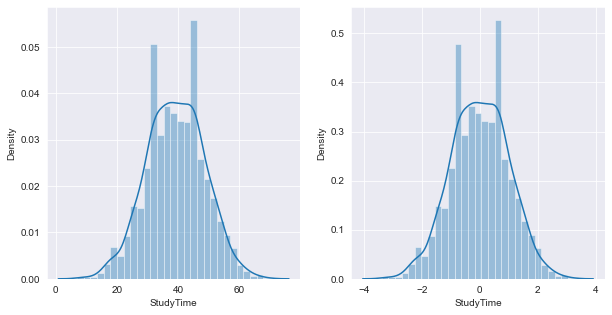

In [46]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df.StudyTime,ax=ax1)
sns.distplot(df_s.StudyTime,ax=ax2)
plt.savefig("standardizeddist.png",dpi=1200)

In [13]:
mlr = ols('Grade ~ GPA + Sleep + StudyTime', df_s).fit()

In [14]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Grade   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     5653.
Date:                Sun, 04 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:03:36   Log-Likelihood:                -644.68
No. Observations:                2077   AIC:                             1297.
Df Residuals:                    2073   BIC:                             1320.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.417e-16      0.007  -4.71e-14      1.000      -0.014       0.014
GPA            0.4866      0.007     67.065      0.000       0.472       0.501
Sleep          0.5050      0.007     69.500      0.000       0.491       0.519
StudyTime      0.6914      0.007     95.102      0.000       0.677       0.706
==============================================================================
Omnibus:                        1.358   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.305
Skew:                          -0.014   Prob(JB):                        0.521
Kurtosis:                       3.120   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""